In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [5]:
df = pd.read_csv('sonar.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [6]:
df[60].value_counts()
# M - Mines
# R - Rocks

M    111
R     97
Name: 60, dtype: int64

In [7]:
df.dtypes.value_counts()

float64    60
object      1
dtype: int64

In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(208, 60)
(208,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [9]:
y[:5]

0    R
1    R
2    R
3    R
4    R
Name: 60, dtype: object

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb = LabelEncoder()

In [12]:
y = lb.fit_transform(y)
 


In [13]:
from collections import Counter

In [14]:
c1 = Counter(y)
print(c1)
# M    111
# R     97

Counter({0: 111, 1: 97})


In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(156, 60)
(52, 60)
(156,)
(52,)


### Model - 1
Without DropOut Layer

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [17]:
m1 = Sequential()
m1.add(Dense(60,activation='relu',input_dim=60))
m1.add(Dense(30,activation='relu'))
m1.add(Dense(1,activation='sigmoid'))

m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [18]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
5/5 [==============================] - 1s 88ms/step - loss: 0.6862 - acc: 0.5577 - val_loss: 0.7079 - val_acc: 0.4615
Epoch 2/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6729 - acc: 0.5962 - val_loss: 0.6871 - val_acc: 0.4808
Epoch 3/30
5/5 [==============================] - 0s 25ms/step - loss: 0.6642 - acc: 0.6154 - val_loss: 0.6736 - val_acc: 0.5192
Epoch 4/30
5/5 [==============================] - 0s 16ms/step - loss: 0.6568 - acc: 0.6282 - val_loss: 0.6676 - val_acc: 0.5385
Epoch 5/30
5/5 [==============================] - 0s 19ms/step - loss: 0.6503 - acc: 0.6282 - val_loss: 0.6699 - val_acc: 0.5000
Epoch 6/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6431 - acc: 0.6282 - val_loss: 0.6665 - val_acc: 0.5192
Epoch 7/30
5/5 [==============================] - 0s 10ms/step - loss: 0.6365 - acc: 0.6410 - val_loss: 0.6598 - val_acc: 0.5385
Epoch 8/30
5/5 [==============================] - 0s 9ms/step - loss: 0.6288 - acc: 0.6410 - val_

In [19]:
r1 = pd.DataFrame(h1.history)
r1['Epcohs'] = h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epcohs
25,0.437067,0.833333,0.468625,0.769231,25
26,0.419499,0.820513,0.444397,0.846154,26
27,0.408779,0.833333,0.435390,0.884615,27
28,0.399919,0.826923,0.432937,0.846154,28
29,0.392727,0.852564,0.432824,0.826923,29


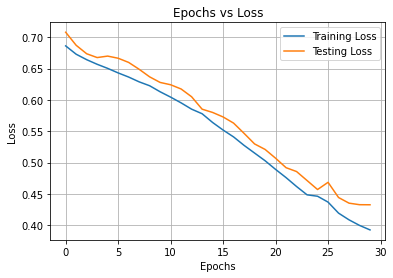

In [20]:
plt.plot(r1['Epcohs'],r1['loss'],label='Training Loss')
plt.plot(r1['Epcohs'],r1['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.grid()
plt.show()

### Model - 2
With Dropout layer

#### Regularization
1) It is amethod to prevent overfitting <br>
2) There are multiple wayus to achieve regularization<br>
a) DropOut<br>
b) Callbacks<br>

#### DropOut(0.x)

DropOut Layer is used to prevent overfitting. It drop x% of connection between the layers it has been aplied to.

#### Callbacks

<b>EarlyStopping Callbacks</b>
In Early Stooping, in the val_loss is no longer getting reduved after the patience level of epochs then, the model stops the training any futher<br>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [22]:
m2 = Sequential()
m2.add(Dense(60,activation='relu',input_dim=60))
m2.add(Dropout(0.2))
m2.add(Dense(30,activation='relu'))
m2.add(Dropout(0.2))
m2.add(Dense(1,activation='sigmoid'))

m2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])


In [23]:
h2 = m2.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=30)

Epoch 1/30
5/5 [==============================] - 1s 72ms/step - loss: 0.7110 - acc: 0.4359 - val_loss: 0.6859 - val_acc: 0.4808
Epoch 2/30
5/5 [==============================] - 0s 14ms/step - loss: 0.6759 - acc: 0.5769 - val_loss: 0.6882 - val_acc: 0.4615
Epoch 3/30
5/5 [==============================] - 0s 14ms/step - loss: 0.6658 - acc: 0.6026 - val_loss: 0.6846 - val_acc: 0.4615
Epoch 4/30
5/5 [==============================] - 0s 14ms/step - loss: 0.6700 - acc: 0.6026 - val_loss: 0.6793 - val_acc: 0.5000
Epoch 5/30
5/5 [==============================] - 0s 13ms/step - loss: 0.6665 - acc: 0.6218 - val_loss: 0.6709 - val_acc: 0.5769
Epoch 6/30
5/5 [==============================] - 0s 11ms/step - loss: 0.6513 - acc: 0.6346 - val_loss: 0.6697 - val_acc: 0.5385
Epoch 7/30
5/5 [==============================] - 0s 16ms/step - loss: 0.6299 - acc: 0.6410 - val_loss: 0.6711 - val_acc: 0.5192
Epoch 8/30
5/5 [==============================] - 0s 18ms/step - loss: 0.6564 - acc: 0.5962 - val

In [25]:
r2 = pd.DataFrame(h2.history)
r2['Epcohs'] = h2.epoch
r2.tail()

,loss,acc,val_loss,val_acc,Epcohs
25,0.507894,0.737179,0.491737,0.750000,25
26,0.489834,0.730769,0.471080,0.846154,26
27,0.469999,0.801282,0.456138,0.826923,27
28,0.456074,0.801282,0.465659,0.807692,28
29,0.456809,0.801282,0.455670,0.846154,29


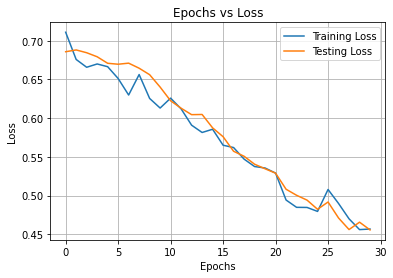

In [26]:
plt.plot(r2['Epcohs'],r2['loss'],label='Training Loss')
plt.plot(r2['Epcohs'],r2['val_loss'],label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()
plt.grid()
plt.show()